In [57]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn 

In [58]:
pplus = pd.read_csv('ParamedicsPlus5150.csv')

In [147]:
pplus['date'] = pd.to_datetime(pplus['Date of 5150'])
pplus['year'] = pplus['date'].dt.year
pplus_dp = pplus.ix[pplus['Age'] != '#VALUE!']
#drop that one column that's always annoying 
pplus_dp['Age']=pplus_dp['Age'].astype(int)
#reset so you can create histograms 

C:\Users\pjhu\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
unique_ids = pd.DataFrame({'count' : pplus.groupby(['ID #', 'Age', 'year']).size()}).reset_index()
primarykey = np.array([])
unique_ids
# for i in unique_ids['ID #']: 
# unique_ids.join(pplus, how='inner', rsuffix='R')


,ID #,Age,year,count
0,1,22,2015,1
1,2,30,2015,2
2,3,86,2013,1
3,4,68,2016,1
4,5,68,2014,1
5,6,31,2015,1
6,7,52,2012,1
7,8,34,2012,1
8,9,43,2012,1
9,10,44,2013,1


Interesting Findings: 
- ID # 15: Remains 36 years old through 2013 to 2015... Is this an error or is this a new person every time? 
- ID # 2762: Remains 28 years old from 2013 to 2015
- ID # 2774

Creating primarykey of the table 

In [328]:
unique_ids['primarykey'] = unique_ids['ID #'].map(str) + pplus['Age']
#creating the primarykey which is the unique identifer for each individual
#check overlap of primarykey (ie ID = 100 and age = 100)

# Creating the Histogram of Ages of Calls

C:\Users\pjhu\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


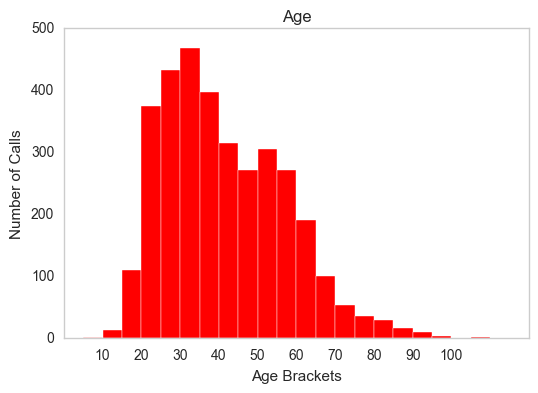

In [318]:
# ages = pplus.drop_duplicates('primarykey')
# #the year and individuals: groupby year, write script to adjust for age incrementing each year 
unique_ids_drop = unique_ids.ix[unique_ids['Age'] != '#VALUE!']
unique_ids_drop['Age'] = unique_ids_drop['Age'].astype(int)
# ages.hist('Age', bins= np.arange(5, 115, 10))
unique_ids_drop.hist('Age', bins=np.arange(5, 115,5),color='r', edgecolor='w')
# tick marks, axes, more informative title 
# plt.title("Who is Paramedics Plus transporting?")
plt.xlabel('Age Brackets')
plt.ylabel('Number of Calls')
plt.grid(False)
plt.xticks(np.arange(10, 110, 10))
plt.savefig('age_distribution.jpg')

In [192]:
# ages[ages['Age'] >= 100]

# Separating by Year

In [140]:
unique_ids_years = pd.DataFrame({'count' : pplus.groupby(['year', 'Age']).size()}).reset_index()
unique_ids_years = unique_ids_years.ix[unique_ids_years['Age'] != '#VALUE!']
unique_ids_years['Age'] = unique_ids_years['Age'].astype(int)
unique_ids_years

,year,Age,count
0,2011,17,1
1,2011,18,1
2,2011,20,1
3,2011,23,2
4,2011,24,4
5,2011,25,5
6,2011,26,2
7,2011,27,2
8,2011,28,2
9,2011,29,6


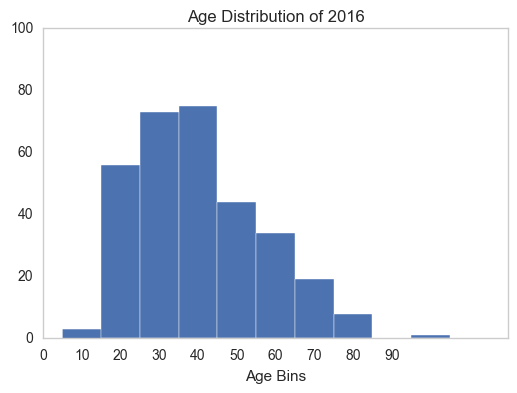

In [263]:
# unique_ids_2016 = unique_ids_years[unique_ids_years['year'] == 2016]
# unique_ids_2016.hist('Age', bins=np.arange(5, 115, 10))
yr2016 = pplus_dp[pplus_dp['year']==2016]
yr2016.hist('Age', bins=np.arange(5, 115, 10), edgecolor='w')
plt.title('Age Distribution of 2016')
plt.grid(False)
plt.xticks(np.arange(0, 100, 10))
axes = plt.gca()
axes.set_ylim([0,100])
plt.xlabel('Age Bins')

#histograms based on the calls, not on individual patients (problem with primary key)
#seaborn color maps 

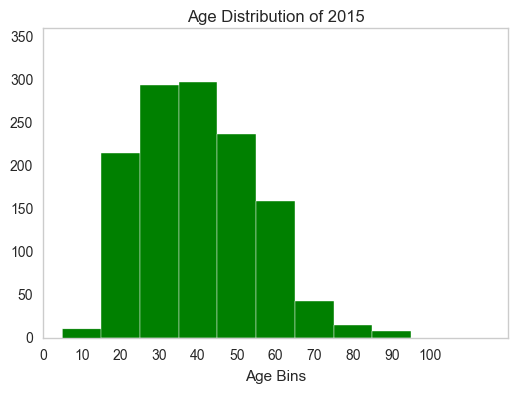

In [181]:
yr2015 = pplus_dp[pplus_dp['year']==2015]
yr2015.hist('Age', bins=np.arange(5, 115, 10), color='g', edgecolor='w')
plt.title('Age Distribution of 2015')
plt.grid(False)
plt.xticks(np.arange(0, 110, 10))
axes = plt.gca()
axes.set_ylim([0,360])
plt.xlabel('Age Bins')
#histograms based on the calls, not on individual patients (problem with primary key)

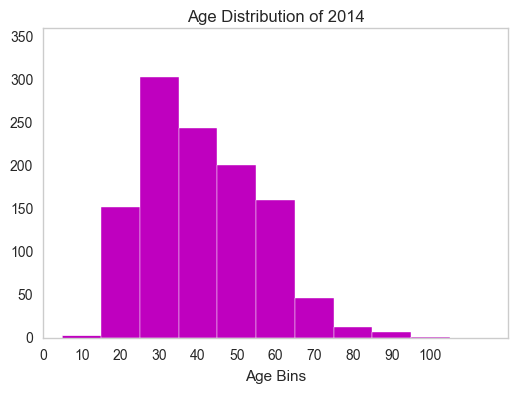

In [180]:
yr2014 = pplus_dp[pplus_dp['year']==2014]
yr2014.hist('Age', bins=np.arange(5, 115, 10), color='m', edgecolor='w')
plt.title('Age Distribution of 2014')
plt.grid(False)
plt.xticks(np.arange(0, 110, 10))
axes = plt.gca()
axes.set_ylim([0,360])
plt.xlabel('Age Bins')
#histograms based on the calls, not on individual patients (problem with primary key)

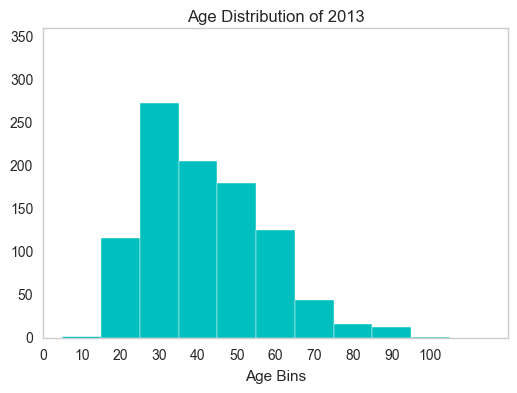

In [179]:
yr2013 = pplus_dp[pplus_dp['year']==2013]
yr2013.hist('Age', bins=np.arange(5, 115, 10), color='c', edgecolor='w')
plt.title('Age Distribution of 2013')
plt.grid(False)
plt.xticks(np.arange(0, 110, 10))
axes = plt.gca()
axes.set_ylim([0,360])
plt.xlabel('Age Bins')
#histograms based on the calls, not on individual patients (problem with primary key)

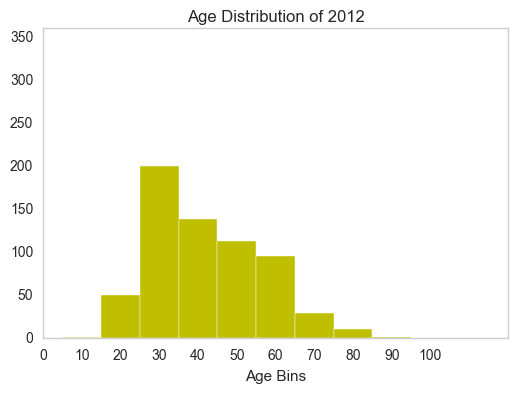

In [178]:
yr2012 = pplus_dp[pplus_dp['year']==2012]
yr2012.hist('Age', bins=np.arange(5, 115, 10), color='y', edgecolor='w')
plt.title('Age Distribution of 2012')
plt.grid(False)
plt.xticks(np.arange(0, 110, 10))
axes = plt.gca()
axes.set_ylim([0,360])
plt.xlabel('Age Bins')
#histograms based on the calls, not on individual patients (problem with primary key)

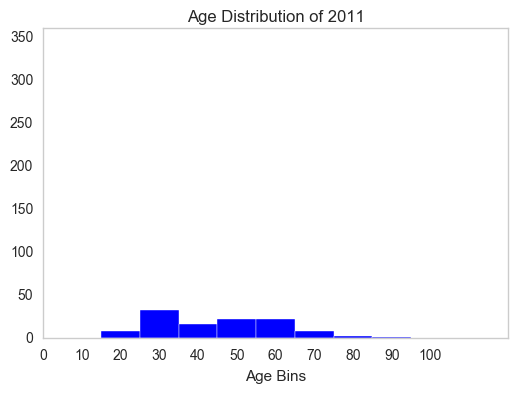

In [244]:
yr2011 = pplus_dp[pplus_dp['year']==2011]
yr2011.hist('Age', bins=np.arange(5, 115, 10), color='b', edgecolor='w')
plt.title('Age Distribution of 2011')
plt.grid(False)
plt.xticks(np.arange(0, 110, 10))
axes = plt.gca()
axes.set_ylim([0,360])
plt.xlabel('Age Bins')
#histograms based on the calls, not on individual patients (problem with primary key)

How many people are we double counting? Is it worth doing the primarykey?

# Number of Calls/Year

In [317]:
pplus_dp['month'] = pplus_dp['date'].dt.month


C:\Users\pjhu\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [360]:
def createDF_months(df):
    yr2011 = {'month': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), 
              '2011': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 66])}
    og2011 = pd.DataFrame(data=yr2011)
    for x in range(2012, 2016):
        yr = pd.DataFrame(df[df['year'] == x].groupby('month').size()).reset_index()
        merged = pd.merge(og2011, yr, on='month')
        og2011 = merged 
    yr2016 = {'month': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), 
              '2016': np.array([132, 111, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
    og2016 = pd.DataFrame(data=yr2016)
    merged = pd.merge(merged, og2016, on='month')
    merged = merged.set_index('month')
    merged['avg'] = merged.mean(numeric_only=True, axis=1)
    merged.columns = ['2011', '2012', '2013', '2014','2015','2016','avg' ]
    return merged 
createDF_months(pplus_dp)

,2011,2012,2013,2014,2015,2016,avg
month,,,,,,,
1,0,66,80,81,115,132,79.000000
2,0,25,60,81,89,111,61.000000
3,0,40,89,99,103,70,66.833333
4,0,41,70,85,109,0,50.833333
5,0,44,77,105,113,0,56.500000
6,0,39,70,100,104,0,52.166667
7,0,39,79,109,115,0,57.000000
8,0,49,87,108,92,0,56.000000
9,0,41,111,96,114,0,60.333333


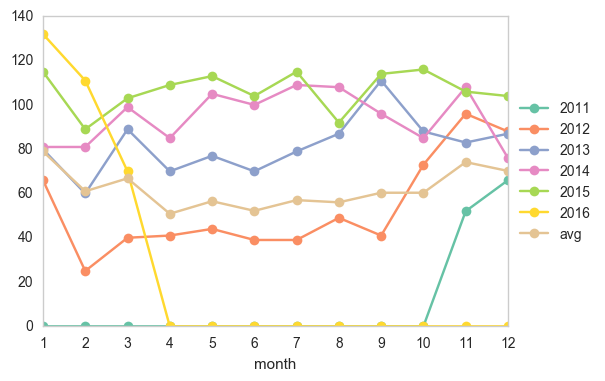

In [406]:
months = createDF_months(pplus_dp)
with sns.color_palette("Set2", 7):
    ax = months.plot(kind='line', marker='o')
# plt.title('Number of Calls per Month every year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(1,13,1))
plt.savefig('Calls Per Year.jpg')

# Repeat Individuals

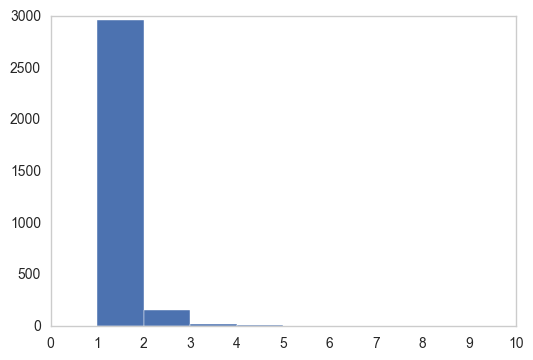

In [408]:
#this is based on primarykey which may or may not be flawed 
repeats = unique_ids.groupby('primarykey').count()
repeats.hist('ID #', bins=np.arange(0, 11, 1), edgecolor='w')
# plt.title('Number of Transports for Patients')
plt.title(' ')
plt.grid(False)
plt.xticks(np.arange(0, 11, 1))
plt.savefig('repeat patients.jpg')
#log scale or maybe do bins 0 to 10 with last bin in (10+)

# Transports to Hospitals Breakdown

In [403]:
hospitals_year = pd.DataFrame(pplus.groupby(['Destination Hospital', 'year']).size()).reset_index()
yr_hospitals = pd.DataFrame(pplus.groupby(['year', 'Destination Hospital']).size()).reset_index()

In [396]:
def createDF_hospitals(df):
    yrs = {'year': np.array([2011, 2012, 2013, 2014, 2015, 2016])}
    og = pd.DataFrame(data=yrs)
    for x in np.unique(df['Destination Hospital']):
        yr = pd.DataFrame(df[df['Destination Hospital'] == x].groupby('year').size()).reset_index()
        merged = pd.merge(og, yr, on='year', how='outer')
        og = merged 
    merged = merged.set_index('year')
    merged['sum'] = merged.sum(numeric_only=True, axis=1)
    merged = merged.fillna(value=0)
    merged.columns = ['Alameda County - Highland Hospital (ACMC)',
       'Alameda County - John George Psychiatric Pavilion',
       'Alameda Hospital', 'Alta Bates - Herrick Campus',
       'Alta Bates Medical Center - Berkeley',
       'Alta Bates Medical Center - Summit Campus',
       "Children's Hospital and Research Center", 'Eden Medical Center',
       'Kaiser Permanente - Fremont', 'Kaiser Permanente - Oakland',
       'Kaiser Permanente - San Leandro', 'San Francisco General Hospital',
       'San Leandro Hospital', 'Washington Hospital', 'Willow Rock Center', 'sum']
    return merged 
createDF_hospitals(pplus_dp)

,Alameda County - Highland Hospital (ACMC),Alameda County - John George Psychiatric Pavilion,Alameda Hospital,Alta Bates - Herrick Campus,Alta Bates Medical Center - Berkeley,Alta Bates Medical Center - Summit Campus,Children's Hospital and Research Center,Eden Medical Center,Kaiser Permanente - Fremont,Kaiser Permanente - Oakland,Kaiser Permanente - San Leandro,San Francisco General Hospital,San Leandro Hospital,Washington Hospital,Willow Rock Center,sum
year,,,,,,,,,,,,,,,,
2011,5,51,0.0,1,50,2,1,0.0,0.0,7,0.0,0.0,0.0,0.0,1,118.0
2012,20,328,0.0,2,234,14,2,2.0,1.0,26,0.0,0.0,3.0,1.0,8,641.0
2013,23,434,1.0,5,423,19,6,6.0,0.0,34,0.0,1.0,11.0,0.0,18,981.0
2014,32,501,0.0,3,481,26,7,4.0,0.0,47,1.0,0.0,13.0,0.0,18,1133.0
2015,35,612,0.0,1,515,27,6,3.0,0.0,46,3.0,0.0,11.0,0.0,21,1280.0
2016,7,150,0.0,1,130,5,3,1.0,0.0,5,0.0,0.0,5.0,0.0,6,313.0


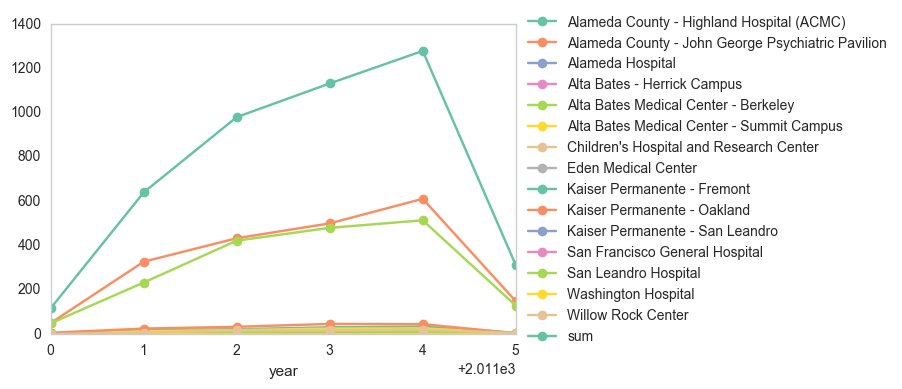

In [409]:
hospitals = createDF_hospitals(pplus_dp)
with sns.color_palette("Set2", 15):
    ax = hospitals.plot(kind='line', marker='o')
# plt.title('Number of Calls per Hospital per Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('hospitals per year.jpg')